<a href="https://colab.research.google.com/github/Vivisteria11/Image-classification/blob/main/CSIR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.google.com



--2024-12-23 12:21:44--  https://www.google.com/
Resolving www.google.com (www.google.com)... 74.125.196.104, 74.125.196.103, 74.125.196.147, ...
Connecting to www.google.com (www.google.com)|74.125.196.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html’

index.html              [ <=>                ]  19.22K  --.-KB/s    in 0s      

2024-12-23 12:21:44 (95.9 MB/s) - ‘index.html’ saved [19678]



Streaming output truncated to the last 5000 lines.
Epoch 10/15 - Training loss: 0.0298
Epoch 10/15 - Training loss: 0.0299
Epoch 10/15 - Training loss: 0.0299
Epoch 10/15 - Training loss: 0.0299
Epoch 10/15 - Training loss: 0.0299
Epoch 10/15 - Training loss: 0.0300
Epoch 10/15 - Training loss: 0.0301
Epoch 10/15 - Training loss: 0.0301
Epoch 10/15 - Training loss: 0.0301
Epoch 10/15 - Training loss: 0.0303
Epoch 10/15 - Training loss: 0.0303
Epoch 10/15 - Training loss: 0.0305
Epoch 10/15 - Training loss: 0.0306
Epoch 10/15 - Training loss: 0.0306
Epoch 10/15 - Training loss: 0.0307
Epoch 10/15 - Training loss: 0.0308
Epoch 10/15 - Training loss: 0.0309
Epoch 10/15 - Training loss: 0.0309
Epoch 10/15 - Training loss: 0.0310
Epoch 10/15 - Training loss: 0.0310
Epoch 10/15 - Training loss: 0.0310
Epoch 10/15 - Training loss: 0.0313
Epoch 10/15 - Training loss: 0.0313
Epoch 10/15 - Training loss: 0.0313
Epoch 10/15 - Training loss: 0.0314
Epoch 10/15 - Training loss: 0.0315
Epoch 10/15 -

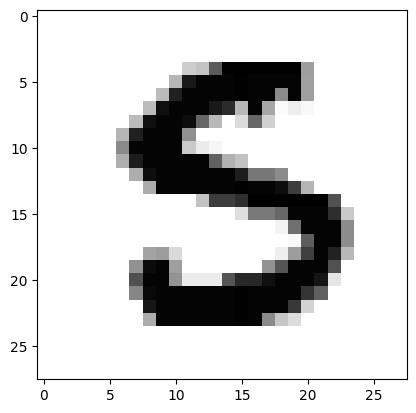

In [2]:

#set up the environments
import torch
import torchvision
import numpy as np
import torchvision
import matplotlib.pyplot as plt
from torch import nn
import torch.optim as optim
from tensorflow.keras.datasets import mnist
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset


# Load the MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the dataset to [-1, 1] (similar to your normalization)
x_train = (x_train / 255.0 - 0.5) / 0.5
x_test = (x_test / 255.0 - 0.5) / 0.5

# Convert NumPy arrays to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create datasets
training_set = TensorDataset(x_train_tensor, y_train_tensor)
validation_set = TensorDataset(x_test_tensor, y_test_tensor)



#transform the image to tensor and then using mean and variance normalize it

#transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5),(0.5))])


#spilt into training and validation sets

#training_set = datasets.MNIST("/path...",download =True,train =True,transform =transform)
#validation_set= datasets.MNIST("/path..",download=True,train=Truerue,transform =transform)

#dataloader splits the data inot batches for training and shuffle reduces overfitting
training_loader = torch.utils.data.DataLoader(training_set,batch_size=64,shuffle=True)
validation_loader=torch.utils.data.DataLoader(validation_set,batch_size=64,shuffle=True)


iterator = iter(training_loader)#iterates over the training data
images,labels=next(iterator)#retrives the next batch of images and labels

print(images.shape)#should be a tensor with 64 images in a batch 1 for greyscale image each a 28*28 pixel images
print(labels.shape)#should be a tensor with 64 labels corresponding to the image

plt.imshow(images[0].numpy().squeeze(),cmap ='gray_r')# to display the image ,convert tensor to a numpy because matplotlib asks and squeeze any extra single dimension

#training the  model

input_size=784#flatten the images 28*28 =784
hidden_layers=(128,64)
output_size=10#0-9 digits present in the MNIST dataset

model = nn.Sequential(
        nn.Linear(input_size,hidden_layers[0]),
        nn.ReLU(),#introduces non linearity
        nn.Linear(hidden_layers[0],hidden_layers[1]),#maps it to the layers
        nn.ReLU(),
        nn.Linear(hidden_layers[1],output_size) ,
        nn.LogSoftmax(dim=1)

)

print(model)


logloss = nn.NLLLoss() #to calculate the negative log loss likelihood from the output of the softmax
images, labels = next(iter(training_loader)) #loads a batch of data continously
images = images.view(images.shape[0], -1) #flattens the image [batch_size,num_features]

log_probabilities = model(images) #log probabilities ,it is a tensor of log probablities
loss = logloss(log_probabilities, labels) #calculate the NLL loss compares predicted to true labels


print('Before backward pass: \n', model[0].weight.grad)#initially none
loss.backward()#readjusting the weights
print('After backward pass: \n', model[0].weight.grad)#will give out values

#stochastic gradient descent optimizier

optimizer = optim.SGD( model.parameters(),lr=0.01 ,momentum =0.9)#dont alter the parameter names as it is the arguments for the

epochs = 15

for e in range(epochs):
        loss_rate = 0 #cumulative loss for epoch

        for images,labels in training_loader:
                img =images.view(images.shape[0],-1)
                optimizer.zero_grad() #clears the gradient from previous steps

                output = model(img)

                loss = logloss(output,labels)

                loss.backward()

                optimizer.step()

                loss_rate += loss.item()#extracts the scalar value from the loss tensor to add it to the loss rate


                print(f"Epoch {e+1}/{epochs} - Training loss: {loss_rate / len(training_loader):.4f}")
                  #print("Epoch {} - Training loss: {}".format(e, loss_rate/len(training_loader)))

images, labels = next(iter(validation_loader))

# Select the first image and reshape it for the model
img = images[0].view(1, 784)

# Disable gradient calculation for inference
with torch.no_grad():
    log_probabilities = model(img)  # Get log probabilities from the model

# Convert log probabilities to probabilities
ps = torch.exp(log_probabilities)

# Get the predicted class (digit)
probab = list(ps.numpy()[0])  # Convert to a Python list
predicted_digit = probab.index(max(probab))  # Find the index of the max probability

# Display the results
print("Predicted Digit =", predicted_digit)
print("Probabilities for each digit class:", probab)


correctly_pred =0
total_img =0

for images,labels in validation_loader:
        for i in range(len(labels)):#for images in that batch

                img = images[i].view(1, 784)#1st batch flattened image

                with(torch.no_grad()):#disabled gradient for faster computation
                 output =model(img)

                 ps = torch.exp(output)#convert log probabilities to probabilities

                 probab = list(ps.numpy()[0])#ps.numpy()[0]: Converts the tensor of probabilities into a NumPy array.
                                             #list(ps.numpy()[0]): Converts the NumPy array into a Python list.
                                              #max(probab): Finds the highest probability.
                                              #probab.index(max(probab)): Returns the index of the highest probability, which corresponds to the predicted label.
                 pred_label = probab.index(max(probab))
                 true_label = labels.numpy()[i]


                if(true_label == pred_label):
                    correctly_pred+= 1
                total_img += 1


print("Number Of Images Tested =", total_img)
print("\nModel Accuracy =", (correctly_pred/total_img))


torch.save(model, './Mnist.pt')



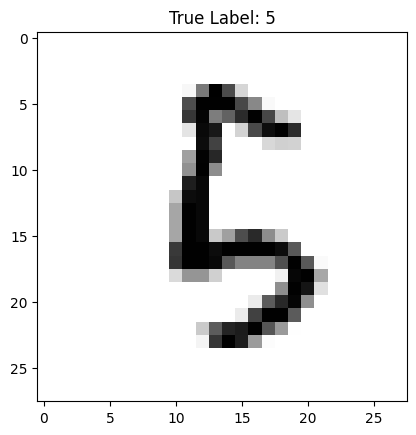

Predicted Label: 5
Probabilities: [0.0012 0.0007 0.0098 0.015  0.0039 0.5909 0.2769 0.     0.0971 0.0046]
True Label: 5


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Function to select a random image and test it
def test_random_image():
    # Select a random image from the validation set
    random_value = random.randint(0, len(validation_loader.dataset) - 1)#run it through the whole dataset
    img, label = validation_loader.dataset[random_value]  # Get the image and its label

    # Display the image
    plt.imshow(img.numpy().squeeze(), cmap="gray_r")
    plt.title(f"True Label: {label}")
    plt.show()

    # Flatten the image and pass it to the model
    img = img.view(1, 784)  # Flatten the image to match the input size
    with torch.no_grad():
        output = model(img)

    # Convert log probabilities to actual probabilities
    probabilities = torch.exp(output)
    probabilities_list = probabilities.numpy()[0]

    # Get the index of the maximum probability
    predicted_label = np.argmax(probabilities_list)

    # Print the results
    print(f"Predicted Label: {predicted_label}")
    print(f"Probabilities: {probabilities_list}")
    print(f"True Label: {label}")

# Call the function to test a random image
test_random_image()


In [3]:

import torch
import torch.nn as nn
import torch.optim as optim
from tensorflow.keras.datasets import mnist
from torch.utils.data import DataLoader, TensorDataset

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the dataset
x_train = (x_train / 255.0 - 0.5) / 0.5
x_test = (x_test / 255.0 - 0.5) / 0.5

# Convert NumPy arrays to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create datasets
training_set = TensorDataset(x_train_tensor, y_train_tensor)
validation_set = TensorDataset(x_test_tensor, y_test_tensor)

# DataLoader
training_loader = DataLoader(training_set, batch_size=64, shuffle=True)
validation_loader = DataLoader(validation_set, batch_size=64, shuffle=True)

# Define the model with CNN and Fully Connected layers
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()

        # Define the convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        # Define max pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 3 * 3, 512)  # Adjusted for output size
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        # Apply convolutional layers with ReLU activations
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = self.pool(nn.ReLU()(self.conv3(x)))

        # Flatten the tensor for the fully connected layers
        x = x.view(x.size(0), -1)  # Flatten the output
        x = nn.ReLU()(self.fc1(x))  # First fully connected layer
        x = self.fc2(x)  # Second fully connected layer (output layer)

        return x

# Initialize the model, loss function, and optimizer
model = CNN_Model()
logloss = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training loop
epochs = 15
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, labels in training_loader:
        # Forward pass
        outputs = model(images)
        loss = logloss(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(training_loader)}")

# Evaluation on validation set
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation for faster inference
    for images, labels in validation_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get the index of the max output
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct / total}%")


Epoch 1, Loss: 0.3371104579850801
Epoch 2, Loss: 0.05016011738060499
Epoch 3, Loss: 0.03507824235400662
Epoch 4, Loss: 0.026322557747870165
Epoch 5, Loss: 0.021004700610329257
Epoch 6, Loss: 0.015979598900823885
Epoch 7, Loss: 0.013312160307781488
Epoch 8, Loss: 0.01112918208535291
Epoch 9, Loss: 0.009329271146815834
Epoch 10, Loss: 0.006607033631630919
Epoch 11, Loss: 0.004767989927057391
Epoch 12, Loss: 0.004368444919190395
Epoch 13, Loss: 0.0033877328779311528
Epoch 14, Loss: 0.001961129193653569
Epoch 15, Loss: 0.001202740254011597
Validation Accuracy: 99.31%


Accuracy: 99.31%
Precision (weighted): 0.99
F1 Score (weighted): 0.99


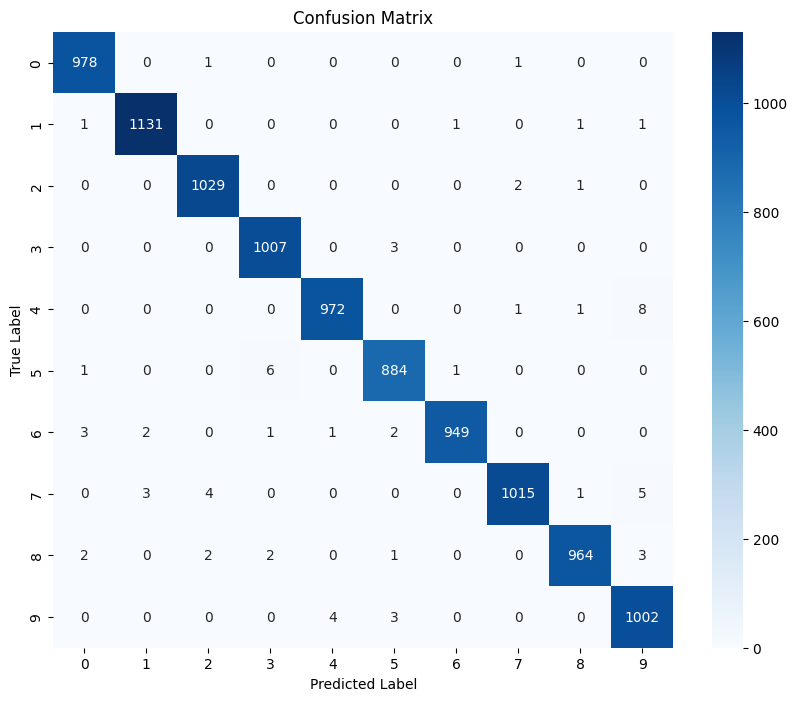

In [4]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set model to evaluation mode
model.eval()

# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []

# Loop through the validation set and get predictions
with torch.no_grad():
    for images, labels in validation_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get the index of the max output
        all_preds.extend(predicted.numpy())  # Store the predicted labels
        all_labels.extend(labels.numpy())  # Store the true labels

# Convert the lists to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Calculate Accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate Precision, F1 Score, and Confusion Matrix
precision = precision_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Precision (weighted): {precision:.2f}")
print(f"F1 Score (weighted): {f1:.2f}")

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


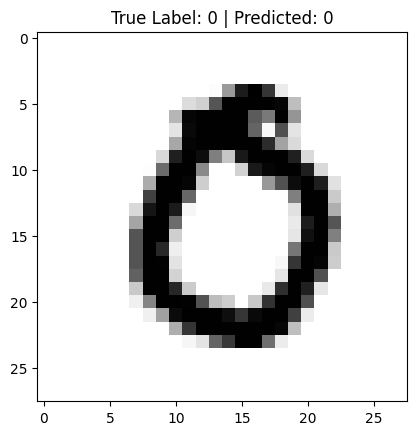

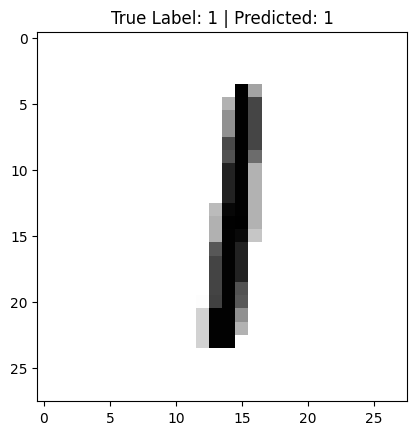

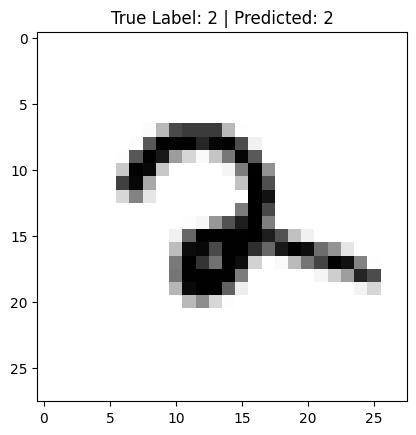

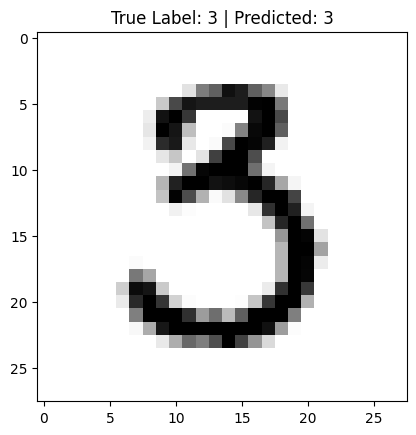

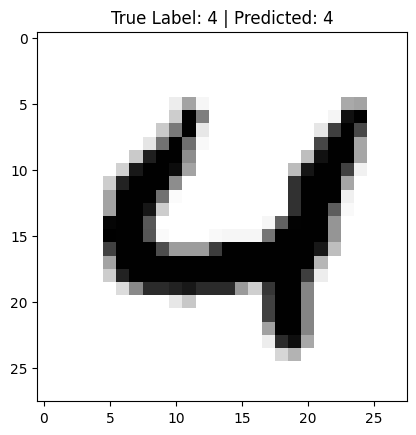

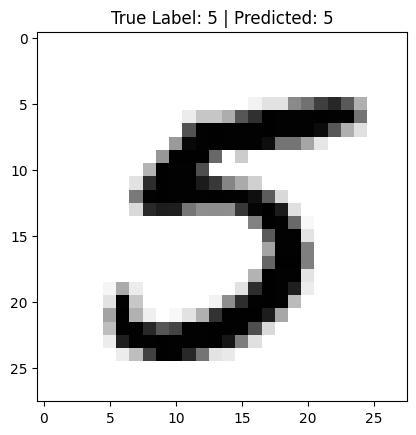

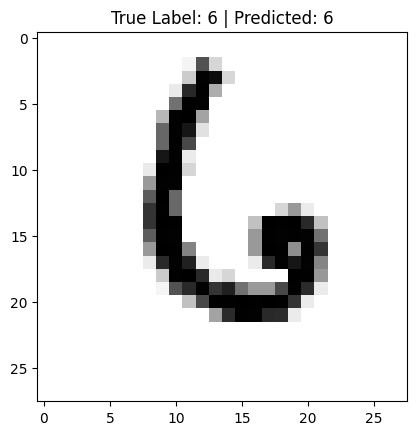

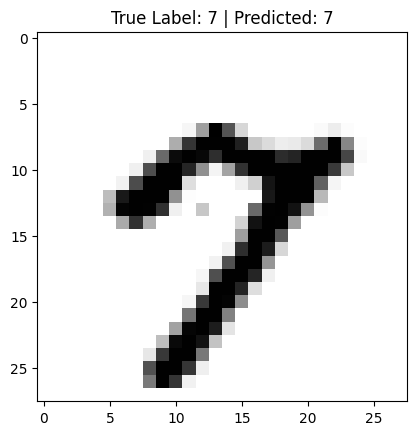

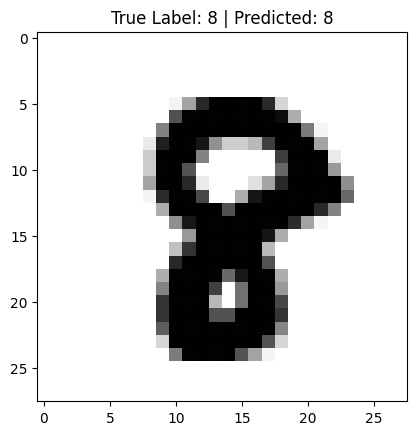

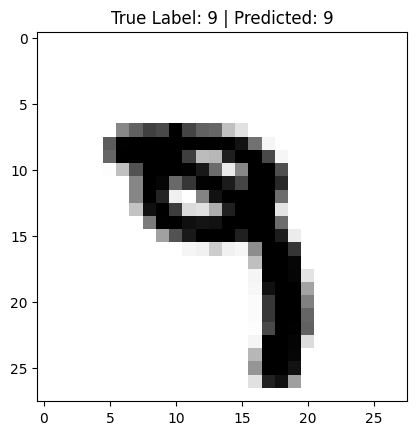

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set model to evaluation mode
model.eval()

# Loop through each digit (0-9)
for digit in range(10):
    # Find a sample image of the current digit
    for images, labels in validation_loader:
        # Find the index of the digit in the batch
        indices = (labels == digit).nonzero(as_tuple=True)[0]
        if len(indices) > 0:  # If there's at least one image of the digit
            # Get the first sample of this digit
            image = images[indices[0]]
            true_label = labels[indices[0]]

            # Make prediction
            with torch.no_grad():
                output = model(image.unsqueeze(0))  # Add batch dimension
                _, predicted = torch.max(output, 1)

            # Display the image and prediction
            plt.imshow(image.squeeze(), cmap='gray_r')
            plt.title(f"True Label: {true_label.item()} | Predicted: {predicted.item()}")
            plt.show()

            # Break out of the loop once we have found one image of the current digit
            break


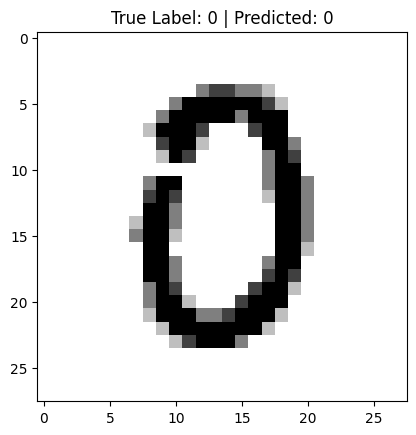

Predicted Label: 0
Probabilities: 0.99999988, 0.00000000, 0.00000006, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000
True Label: 0


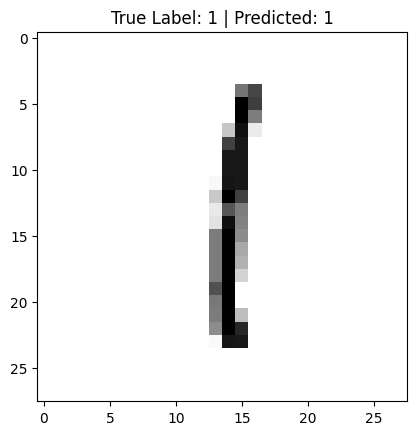

Predicted Label: 1
Probabilities: 0.00000001, 0.99999952, 0.00000005, 0.00000000, 0.00000034, 0.00000000, 0.00000000, 0.00000008, 0.00000001, 0.00000000
True Label: 1


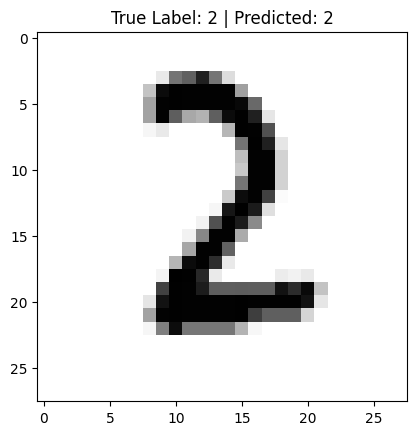

Predicted Label: 2
Probabilities: 0.00000000, 0.00000000, 1.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000
True Label: 2


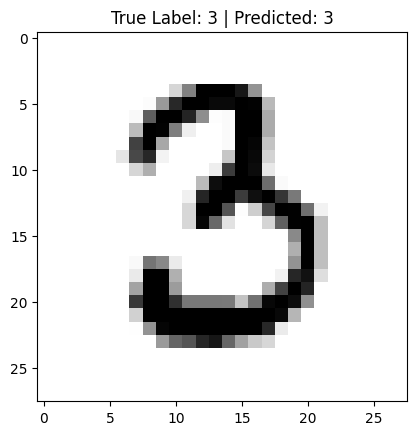

Predicted Label: 3
Probabilities: 0.00000000, 0.00000000, 0.00000000, 1.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000
True Label: 3


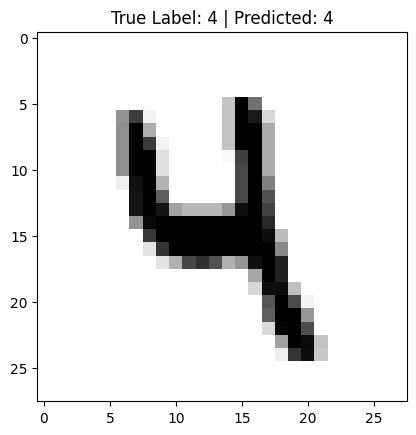

Predicted Label: 4
Probabilities: 0.00000000, 0.00000001, 0.00000000, 0.00000000, 1.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000
True Label: 4


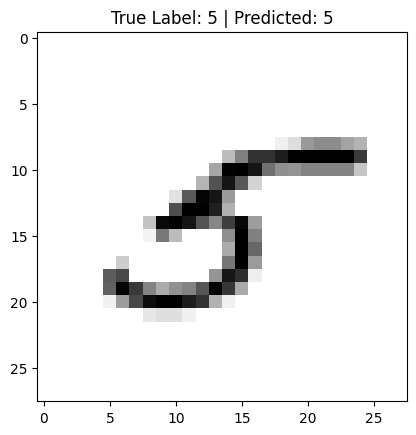

Predicted Label: 5
Probabilities: 0.00000000, 0.00000000, 0.00000000, 0.00000632, 0.00000000, 0.99999368, 0.00000000, 0.00000000, 0.00000000, 0.00000000
True Label: 5


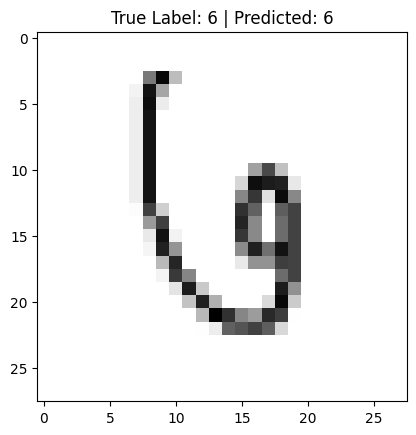

Predicted Label: 6
Probabilities: 0.00007944, 0.00000015, 0.00000002, 0.00000641, 0.00000003, 0.00087154, 0.99904162, 0.00000000, 0.00000075, 0.00000001
True Label: 6


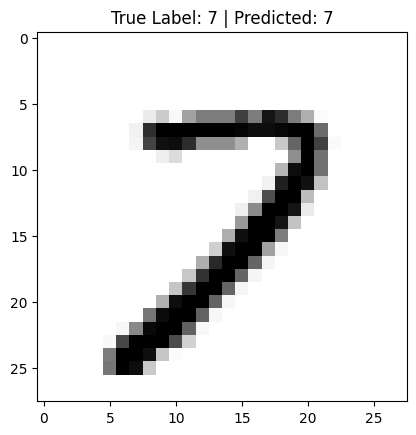

Predicted Label: 7
Probabilities: 0.00000000, 0.00000000, 0.00000017, 0.00000001, 0.00000002, 0.00000000, 0.00000000, 0.99999082, 0.00000000, 0.00000891
True Label: 7


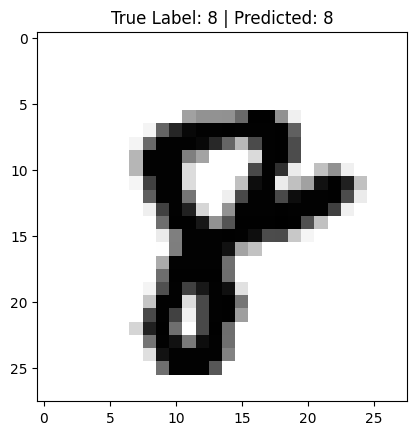

Predicted Label: 8
Probabilities: 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 1.00000000, 0.00000000
True Label: 8


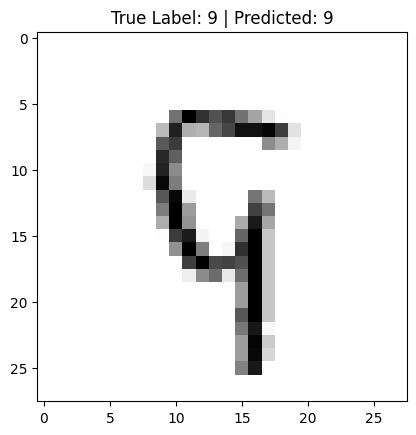

Predicted Label: 9
Probabilities: 0.00000005, 0.00000000, 0.00000002, 0.00000002, 0.00000011, 0.00382983, 0.00000008, 0.00000385, 0.00000923, 0.99615675
True Label: 9


In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Set model to evaluation mode
model.eval()

# Loop through each digit (0-9)
for digit in range(10):
    # Find a sample image of the current digit
    for images, labels in validation_loader:
        # Find the index of the digit in the batch
        indices = (labels == digit).nonzero(as_tuple=True)[0]
        if len(indices) > 0:  # If there's at least one image of the digit
            # Get the first sample of this digit
            image = images[indices[0]]
            true_label = labels[indices[0]]

            # Make prediction
            with torch.no_grad():
                output = model(image.unsqueeze(0))  # Add batch dimension
                probabilities = F.softmax(output, dim=1)  # Apply softmax to get probabilities
                probabilities_list = probabilities.squeeze().numpy()

                # Get predicted label
                _, predicted = torch.max(output, 1)

            # Display the image and prediction details
            plt.imshow(image.squeeze(), cmap='gray_r')
            plt.title(f"True Label: {true_label.item()} | Predicted: {predicted.item()}")
            plt.show()

            # Print probabilities and labels with 8 decimal places for clearer distinction
            print(f"Predicted Label: {predicted.item()}")
            print(f"Probabilities: {', '.join([f'{prob:.8f}' for prob in probabilities_list])}")
            print(f"True Label: {true_label.item()}")

            # Break out of the loop once we have found one image of the current digit
            break


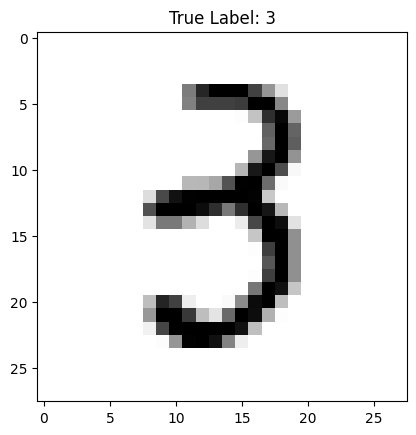

Predicted Label: 3
Probabilities: [4.5733542e-18 2.9945833e-16 1.6017785e-16 1.0000000e+00 2.7165749e-20
 2.6207490e-09 1.5962663e-21 3.6504304e-16 2.7589000e-14 2.0892836e-13]
True Label: 3


In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt
import torch

# Function to select a random image and test it
def test_random_image():
    # Select a random image from the validation set
    random_value = random.randint(0, len(validation_loader.dataset) - 1)  # Select random image
    img, label = validation_loader.dataset[random_value]  # Get image and label

    # Display the image
    plt.imshow(img.numpy().squeeze(), cmap="gray_r")
    plt.title(f"True Label: {label}")
    plt.show()

    # Pass the image through the CNN model (no need to flatten here)
    img = img.unsqueeze(0)  # Add batch dimension (since model expects a batch)
    with torch.no_grad():
        output = model(img)

    # Convert logits to probabilities using softmax
    probabilities = torch.softmax(output, dim=1)  # Use softmax for probability distribution
    probabilities_list = probabilities.numpy()[0]  # Convert to numpy for easier printing

    # Get the index of the maximum probability (predicted label)
    predicted_label = np.argmax(probabilities_list)

    # Print the results
    print(f"Predicted Label: {predicted_label}")
    print(f"Probabilities: {probabilities_list}")
    print(f"True Label: {label}")

# Call the function to test a random image
test_random_image()


In [11]:
import torch
import numpy as np

logits = torch.tensor([4.5733542e-18, 2.9945833e-16, 1.6017785e-16, 1.0000000e+00, 2.7165749e-20,
                       2.6207490e-09, 1.5962663e-21, 3.6504304e-16, 2.7589000e-14, 2.0892836e-13])

# Apply softmax
probabilities = torch.softmax(logits, dim=0)

# Print probabilities
probabilities_numpy = probabilities.numpy()
print(probabilities_numpy)


[0.08533674 0.08533674 0.08533674 0.23196931 0.08533674 0.08533674
 0.08533674 0.08533674 0.08533674 0.08533674]


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from tensorflow.keras.datasets import mnist
from torch.utils.data import DataLoader, TensorDataset

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the dataset
x_train = (x_train / 255.0 - 0.5) / 0.5
x_test = (x_test / 255.0 - 0.5) / 0.5

# Convert NumPy arrays to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create datasets
training_set = TensorDataset(x_train_tensor, y_train_tensor)
validation_set = TensorDataset(x_test_tensor, y_test_tensor)

# DataLoader
training_loader = DataLoader(training_set, batch_size=64, shuffle=True)
validation_loader = DataLoader(validation_set, batch_size=64, shuffle=True)

# Define the updated model with more convolutional layers
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()

        # Define the convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)  # New convolutional layer

        # Define max pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        # A method to calculate the output size after the convolutions and pooling
        self._to_linear = None
        self._get_linear_input_size()

        # Fully connected layers
        self.fc1 = nn.Linear(self._to_linear, 512)  # Adjusted for output size after additional conv layers
        self.fc2 = nn.Linear(512, 256)             # New fully connected layer
        self.fc3 = nn.Linear(256, 10)              # Output layer for classification

    def _get_linear_input_size(self):
        """Calculates the size of the input to the fully connected layer"""
        with torch.no_grad():
            x = torch.zeros(1, 1, 28, 28)  # Batch size 1, image size 28x28
            x = self.pool(nn.ReLU()(self.conv1(x)))
            x = self.pool(nn.ReLU()(self.conv2(x)))
            x = self.pool(nn.ReLU()(self.conv3(x)))
            x = self.pool(nn.ReLU()(self.conv4(x)))  # Apply the new conv layer
            self._to_linear = x.numel()  # Get the number of elements in the tensor after the conv layers

    def forward(self, x):
        # Apply convolutional layers with ReLU activations
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = self.pool(nn.ReLU()(self.conv3(x)))
        x = self.pool(nn.ReLU()(self.conv4(x)))  # Apply the new conv layer

        # Flatten the tensor for the fully connected layers
        x = x.view(x.size(0), -1)  # Flatten the output
        x = nn.ReLU()(self.fc1(x))  # First fully connected layer
        x = nn.ReLU()(self.fc2(x))  # Second fully connected layer
        x = self.fc3(x)  # Third fully connected layer (output layer)

        return x

# Initialize the model, loss function, and optimizer
model = CNN_Model().to(device)  # Move model to GPU
logloss = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training loop
epochs = 15
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, labels in training_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU

        # Forward pass
        outputs = model(images)
        loss = logloss(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(training_loader)}")

# Evaluation on validation set
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation for faster inference
    for images, labels in validation_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get the index of the max output
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct / total}%")


Epoch 1, Loss: 2.3005541639287332
Epoch 2, Loss: 2.2875326940499896
Epoch 3, Loss: 1.4662437252462037
Epoch 4, Loss: 0.2729245295791801
Epoch 5, Loss: 0.13875788186134688
Epoch 6, Loss: 0.10165629948058458
Epoch 7, Loss: 0.08168603735975921
Epoch 8, Loss: 0.06950070437635662
Epoch 9, Loss: 0.059692909692112266
Epoch 10, Loss: 0.05336621169746518
Epoch 11, Loss: 0.04842461910752107
Epoch 12, Loss: 0.043991037268764466
Epoch 13, Loss: 0.03978372908354715
Epoch 14, Loss: 0.03553432496939736
Epoch 15, Loss: 0.03367860178485004
Validation Accuracy: 98.97%


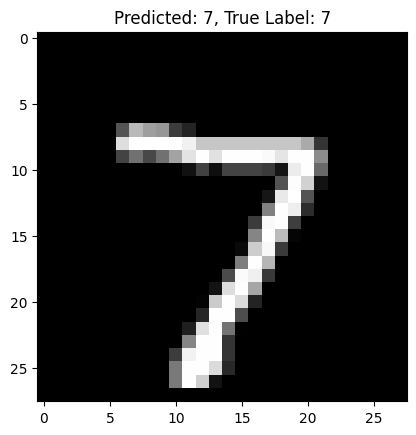

Probabilities for each class: tensor([2.8256e-08, 8.2114e-06, 1.3699e-05, 2.1626e-06, 5.9403e-08, 9.3872e-09,
        2.6661e-14, 9.9997e-01, 2.5664e-08, 3.9640e-06])


In [5]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Load a test image
test_image, test_label = x_test_tensor[0], y_test_tensor[0]  # Taking the first image from the test set

# Add batch dimension and move to device (GPU if available)
test_image = test_image.unsqueeze(0).to(device)

# Make the prediction using the trained model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    logits = model(test_image)  # Get the raw output (logits) from the model

# Apply softmax to get probabilities
probabilities = F.softmax(logits, dim=1)  # Apply softmax to convert logits to probabilities

# Get the predicted class (with the highest probability)
predicted_class = torch.argmax(probabilities, dim=1).item()

# Display the image and the prediction
plt.imshow(test_image.squeeze().cpu(), cmap="gray")
plt.title(f"Predicted: {predicted_class}, True Label: {test_label}")
plt.show()

# Print the probabilities for each class
print(f"Probabilities for each class: {probabilities.cpu().squeeze()}")


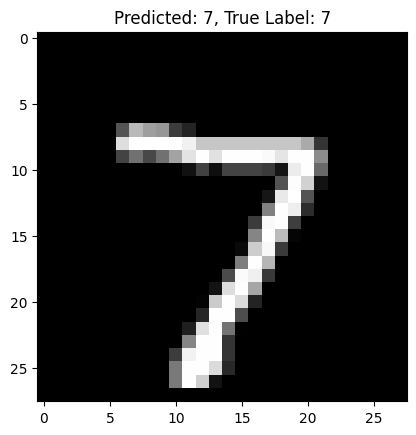

Probabilities for each class: tensor([    0.00000,     0.00001,     0.00001,     0.00000,     0.00000,
            0.00000,     0.00000,     0.99997,     0.00000,     0.00000])


In [6]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Set print options to display tensor with more precision
torch.set_printoptions(precision=5, sci_mode=False)

# Load a test image (taking the first image from the test set)
test_image, test_label = x_test_tensor[0], y_test_tensor[0]

# Add batch dimension and move to device (GPU if available)
test_image = test_image.unsqueeze(0).to(device)

# Make the prediction using the trained model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    logits = model(test_image)  # Get the raw output (logits) from the model

# Apply softmax to get probabilities
probabilities = F.softmax(logits, dim=1)  # Apply softmax to convert logits to probabilities

# Get the predicted class (with the highest probability)
predicted_class = torch.argmax(probabilities, dim=1).item()

# Display the image and the prediction
plt.imshow(test_image.squeeze().cpu(), cmap="gray")
plt.title(f"Predicted: {predicted_class}, True Label: {test_label}")
plt.show()

# Print the probabilities for each class
print(f"Probabilities for each class: {probabilities.cpu().squeeze()}")


Epoch 1, Training Loss: 0.0042, Validation Loss: 0.0314
Epoch 2, Training Loss: 0.0037, Validation Loss: 0.0305
Epoch 3, Training Loss: 0.0035, Validation Loss: 0.0300
Epoch 4, Training Loss: 0.0034, Validation Loss: 0.0437
Epoch 5, Training Loss: 0.0031, Validation Loss: 0.0330
Epoch 6, Training Loss: 0.0023, Validation Loss: 0.0327
Epoch 7, Training Loss: 0.0028, Validation Loss: 0.0306
Epoch 8, Training Loss: 0.0030, Validation Loss: 0.0321
Epoch 9, Training Loss: 0.0020, Validation Loss: 0.0336
Epoch 10, Training Loss: 0.0020, Validation Loss: 0.0347
Epoch 11, Training Loss: 0.0017, Validation Loss: 0.0348
Epoch 12, Training Loss: 0.0016, Validation Loss: 0.0323
Epoch 13, Training Loss: 0.0014, Validation Loss: 0.0345
Epoch 14, Training Loss: 0.0013, Validation Loss: 0.0337
Epoch 15, Training Loss: 0.0013, Validation Loss: 0.0328
Epoch 16, Training Loss: 0.0011, Validation Loss: 0.0336
Epoch 17, Training Loss: 0.0012, Validation Loss: 0.0340
Epoch 18, Training Loss: 0.0010, Validat

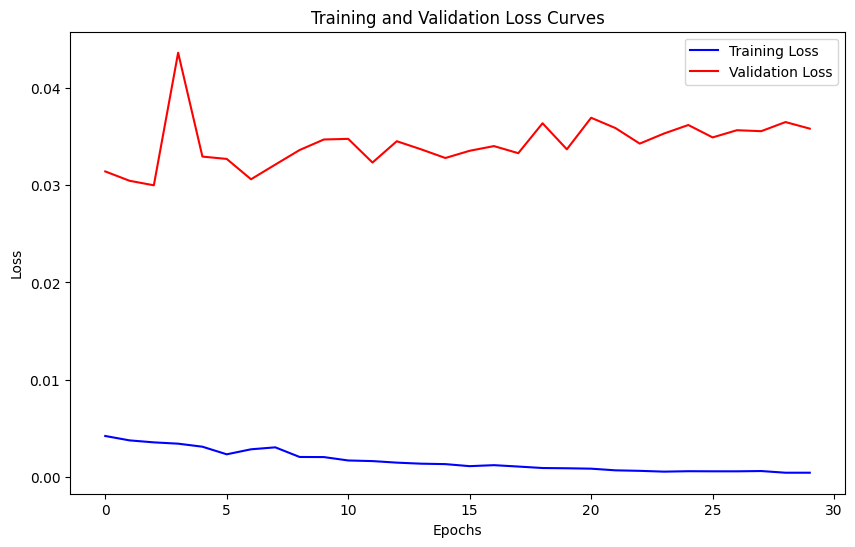

Final Validation Accuracy: 99.20%


In [9]:
import matplotlib.pyplot as plt

# Store training and validation losses for each epoch
train_losses = []
valid_losses = []

# Training loop
epochs = 30
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_train_loss = 0.0

    # Training phase
    for images, labels in training_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU

        # Forward pass
        outputs = model(images)
        loss = logloss(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

    # Average the loss for this epoch and store it
    train_losses.append(running_train_loss / len(training_loader))

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    running_valid_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculation for faster inference
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            outputs = model(images)
            loss = logloss(outputs, labels)
            running_valid_loss += loss.item()

            _, predicted = torch.max(outputs, 1)  # Get the index of the max output
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Average the validation loss for this epoch
    valid_losses.append(running_valid_loss / len(validation_loader))

    # Print validation accuracy for this epoch
    print(f"Epoch {epoch + 1}, Training Loss: {train_losses[-1]:.4f}, Validation Loss: {valid_losses[-1]:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10,6))
plt.plot(range(epochs), train_losses, label='Training Loss', color='blue')
plt.plot(range(epochs), valid_losses, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

# Final evaluation accuracy
print(f"Final Validation Accuracy: {100 * correct / total:.2f}%")


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from tensorflow.keras.datasets import mnist
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the dataset and apply transformations for data augmentation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),  # Normalization
    transforms.RandomRotation(10),  # Random rotation for augmentation
    transforms.RandomHorizontalFlip(),  # Random horizontal flip for augmentation
])

# Convert NumPy arrays to PyTorch tensors and apply transformations
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Apply transformations to datasets
train_data = TensorDataset(x_train_tensor, y_train_tensor)
test_data = TensorDataset(x_test_tensor, y_test_tensor)

# DataLoader with augmentation
training_loader = DataLoader(train_data, batch_size=64, shuffle=True)
validation_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Define the updated model with Dropout for regularization
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()

        # Define the convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)  # New convolutional layer

        # Define max pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        # A method to calculate the output size after the convolutions and pooling
        self._to_linear = None
        self._get_linear_input_size()

        # Fully connected layers with Dropout
        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)  # Output layer for classification

        # Dropout layers for regularization
        self.dropout = nn.Dropout(p=0.5)  # Dropout with a probability of 50%

    def _get_linear_input_size(self):
        """Calculates the size of the input to the fully connected layer"""
        with torch.no_grad():
            x = torch.zeros(1, 1, 28, 28)  # Batch size 1, image size 28x28
            x = self.pool(nn.ReLU()(self.conv1(x)))
            x = self.pool(nn.ReLU()(self.conv2(x)))
            x = self.pool(nn.ReLU()(self.conv3(x)))
            x = self.pool(nn.ReLU()(self.conv4(x)))  # Apply the new conv layer
            self._to_linear = x.numel()  # Get the number of elements in the tensor after the conv layers

    def forward(self, x):
        # Apply convolutional layers with ReLU activations
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = self.pool(nn.ReLU()(self.conv3(x)))
        x = self.pool(nn.ReLU()(self.conv4(x)))  # Apply the new conv layer

        # Flatten the tensor for the fully connected layers
        x = x.view(x.size(0), -1)  # Flatten the output
        x = nn.ReLU()(self.fc1(x))  # First fully connected layer
        x = self.dropout(x)  # Apply dropout after the first fully connected layer
        x = nn.ReLU()(self.fc2(x))  # Second fully connected layer
        x = self.dropout(x)  # Apply dropout after the second fully connected layer
        x = self.fc3(x)  # Third fully connected layer (output layer)

        return x

# Initialize the model, loss function, and optimizer
model = CNN_Model().to(device)  # Move model to GPU
logloss = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Early Stopping parameters
best_val_loss = float('inf')
patience = 5  # How many epochs to wait before early stopping
epochs_since_improvement = 0

# Training loop
epochs = 30
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, labels in training_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU

        # Forward pass
        outputs = model(images)
        loss = logloss(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate validation loss after each epoch
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = logloss(outputs, labels)
            val_loss += loss.item()

    # Calculate average losses
    avg_train_loss = running_loss / len(training_loader)
    avg_val_loss = val_loss / len(validation_loader)

    print(f"Epoch {epoch + 1}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_since_improvement = 0
    else:
        epochs_since_improvement += 1
        if epochs_since_improvement >= patience:
            print(f"Early stopping at epoch {epoch + 1}")
            break

# Evaluation on validation set
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation for faster inference
    for images, labels in validation_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get the index of the max output
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Final Validation Accuracy: {100 * correct / total:.2f}%")


Epoch 1, Training Loss: 0.3864, Validation Loss: 0.0543
Epoch 2, Training Loss: 0.0861, Validation Loss: 0.0389
Epoch 3, Training Loss: 0.0603, Validation Loss: 0.0284
Epoch 4, Training Loss: 0.0462, Validation Loss: 0.0248
Epoch 5, Training Loss: 0.0362, Validation Loss: 0.0235
Epoch 6, Training Loss: 0.0293, Validation Loss: 0.0322
Epoch 7, Training Loss: 0.0247, Validation Loss: 0.0229
Epoch 8, Training Loss: 0.0219, Validation Loss: 0.0255
Epoch 9, Training Loss: 0.0192, Validation Loss: 0.0285
Epoch 10, Training Loss: 0.0169, Validation Loss: 0.0234
Epoch 11, Training Loss: 0.0147, Validation Loss: 0.0232
Epoch 12, Training Loss: 0.0113, Validation Loss: 0.0253
Early stopping at epoch 12
Final Validation Accuracy: 99.23%


Classification Report:
              precision    recall  f1-score   support

           0     0.9929    0.9980    0.9954       980
           1     0.9956    0.9991    0.9974      1135
           2     0.9932    0.9942    0.9937      1032
           3     0.9911    0.9950    0.9931      1010
           4     0.9929    0.9919    0.9924       982
           5     0.9866    0.9922    0.9894       892
           6     0.9885    0.9906    0.9896       958
           7     0.9913    0.9932    0.9922      1028
           8     0.9948    0.9887    0.9918       974
           9     0.9950    0.9792    0.9870      1009

    accuracy                         0.9923     10000
   macro avg     0.9922    0.9922    0.9922     10000
weighted avg     0.9923    0.9923    0.9923     10000



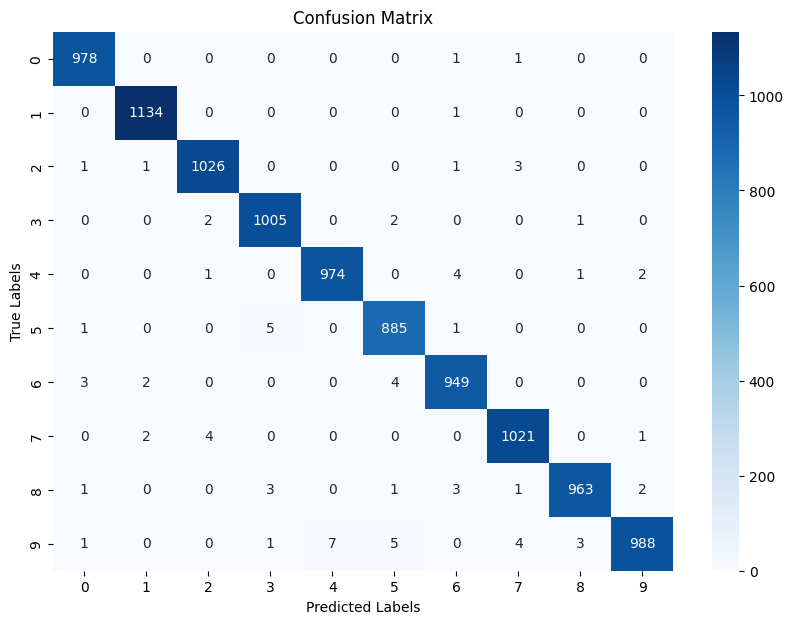

Overall Accuracy: 99.23%
Accuracy for digit 0: 99.80%
Accuracy for digit 1: 99.91%
Accuracy for digit 2: 99.42%
Accuracy for digit 3: 99.50%
Accuracy for digit 4: 99.19%
Accuracy for digit 5: 99.22%
Accuracy for digit 6: 99.06%
Accuracy for digit 7: 99.32%
Accuracy for digit 8: 98.87%
Accuracy for digit 9: 97.92%


In [11]:
import torch
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your model is already trained, we proceed with testing on validation data

# Evaluation on validation set
model.eval()  # Set the model to evaluation mode
all_preds = []
all_labels = []

with torch.no_grad():  # Disable gradient calculation for faster inference
    for images, labels in validation_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get the index of the max output

        all_preds.extend(predicted.cpu().numpy())  # Store predictions
        all_labels.extend(labels.cpu().numpy())  # Store ground truth labels

# Convert lists to NumPy arrays for evaluation
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Calculate classification report for each class (digit 0-9)
print("Classification Report:")
print(classification_report(all_labels, all_preds, digits=4))

# Generate confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate accuracy
accuracy = 100 * np.sum(all_preds == all_labels) / len(all_labels)
print(f"Overall Accuracy: {accuracy:.2f}%")

# Optionally, calculate class-specific accuracy
for i in range(10):
    class_accuracy = np.sum((all_preds == i) & (all_labels == i)) / np.sum(all_labels == i) * 100
    print(f"Accuracy for digit {i}: {class_accuracy:.2f}%")


In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Loop through each digit
for digit in range(10):
    true_labels = []
    predicted_labels = []

    # Loop through validation data
    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            # Filter the labels for the current digit
            digit_mask = labels == digit
            true_labels.extend(labels[digit_mask].cpu().numpy())
            predicted_labels.extend(predicted[digit_mask].cpu().numpy())

    if len(true_labels) > 0:
        accuracy = accuracy_score(true_labels, predicted_labels)
        precision = precision_score(true_labels, predicted_labels, average='macro', zero_division=1)
        recall = recall_score(true_labels, predicted_labels, average='macro', zero_division=1)
        f1 = f1_score(true_labels, predicted_labels, average='macro', zero_division=1)

        print(f"Digit {digit}:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1 Score: {f1:.4f}")
    else:
        print(f"Digit {digit}: No instances in the validation set")


Digit 0:
  Accuracy: 0.9980
  Precision: 0.3333
  Recall: 0.9993
  F1 Score: 0.3330
Digit 1:
  Accuracy: 0.9991
  Precision: 0.5000
  Recall: 0.9996
  F1 Score: 0.4998
Digit 2:
  Accuracy: 0.9942
  Precision: 0.2000
  Recall: 0.9988
  F1 Score: 0.1994
Digit 3:
  Accuracy: 0.9950
  Precision: 0.2500
  Recall: 0.9988
  F1 Score: 0.2494
Digit 4:
  Accuracy: 0.9919
  Precision: 0.2000
  Recall: 0.9984
  F1 Score: 0.1992
Digit 5:
  Accuracy: 0.9922
  Precision: 0.2500
  Recall: 0.9980
  F1 Score: 0.2490
Digit 6:
  Accuracy: 0.9906
  Precision: 0.2500
  Recall: 0.9977
  F1 Score: 0.2488
Digit 7:
  Accuracy: 0.9932
  Precision: 0.2500
  Recall: 0.9983
  F1 Score: 0.2491
Digit 8:
  Accuracy: 0.9887
  Precision: 0.1429
  Recall: 0.9984
  F1 Score: 0.1420
Digit 9:
  Accuracy: 0.9792
  Precision: 0.1429
  Recall: 0.9970
  F1 Score: 0.1414


In [16]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Reshaping and scaling data
X_train_full = X_train_full.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Compute class weights to balance the classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Convert the class_weights into a dictionary format
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Model architecture with dropout regularization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Assuming 10 digits (0-9)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model using augmented data and class weights
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(X_val, y_val),
    class_weight=class_weights_dict  # Use class weights for balancing
)

# Evaluate the model on validation set
y_pred = np.argmax(model.predict(X_val), axis=1)

# Evaluate metrics for each digit
for digit in range(10):
    true_labels = (y_val == digit).astype(int)
    predicted_labels = (y_pred == digit).astype(int)

    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='binary', zero_division=1)
    recall = recall_score(true_labels, predicted_labels, average='binary', zero_division=1)
    f1 = f1_score(true_labels, predicted_labels, average='binary', zero_division=1)

    print(f"Digit {digit}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-" * 30)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.4095 - loss: 1.6494 - val_accuracy: 0.8770 - val_loss: 0.4088
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7239 - loss: 0.8425 - val_accuracy: 0.9275 - val_loss: 0.2451
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 14ms/step - accuracy: 0.7837 - loss: 0.6689 - val_accuracy: 0.9450 - val_loss: 0.1844
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.8123 - loss: 0.5936 - val_accuracy: 0.9608 - val_loss: 0.1396
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8363 - loss: 0.5264 - val_accuracy: 0.9630 - val_loss: 0.1212
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.8476 - loss: 0.4923 - val_accuracy: 0.9637 - val_loss: 0.1230
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8583 - loss: 0.4620 - val_accuracy: 0.9686 - val_loss: 0.1051
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8661 - loss: 0.43